In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('data_1000.csv')


In [137]:
df.columns

Index(['Unnamed: 0', 'City', 'Date', 'Text', 'Username', 'Category'], dtype='object')

In [138]:
df = df.drop(['Unnamed: 0'],axis=1)

In [139]:
df.head()

,City,Date,Text,Username,Category
0,Weston,2022-09-29 01:51:53+00:00,"SO, FOR ALL OF YOU THINKING THAT THIS HURRICAN...",colleenblueeyes,other
1,Davie,2022-09-27 20:49:02+00:00,It’s been raining cats &amp; dogs since yester...,JenHemmerdinger,human impact
2,Davie,2022-09-29 00:07:23+00:00,Hurricane Ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather updates
3,St. Petersburg,2022-09-28 16:28:25+00:00,@wusf is now in modified extended coverage of ...,wusfschreiner,other
4,Tampa,2022-09-24 17:13:26+00:00,Tampa Bay could see very deadly storm surge in...,AnthonyClose,community support


In [140]:
df['Category'].unique()

array(['other', 'human impact', 'weather updates', 'community support',
       'power outages', 'storm damage', 'relief efforts', 'safety',
       'Evacuation', 'Government response', 'aftermath', 'others',
       'human impacts', 'evacuation', 'donations', 'government response',
       'human imapact', 'human imapct', 'power outage', 'Weather update',
       'Others', 'Evacuation ', 'Others ', 'Community support',
       'Weather update ', 'Storm damage ', 'Relief effort',
       'Aftermath and recovery ', 'Power outage ', 'Human impact ',
       'Human impact', 'Community support ', 'Government response ',
       'Power outage', 'Donations ', 'Other', 'Donations', 'Storm damage',
       'Orhers', 'Power outages', 'Power Outage', 'Human Impact',
       'Strom Damage', nan, 'weather update', 'Governement Response',
       'Community Support', 'power Outage', 'strom Damage',
       'governement Response', 'Government Responses', 'Weather updates',
       'Other ', 'Power outage, weather

In [141]:

# Define a dictionary to map similar categories to a single group
category_mapping = {
    'human impact': 'human impact',
    'human impacts': 'human impact',
    'human imapact': 'human impact',
    'human imapct': 'human impact',
    'Human impact ' : 'human impact',
    'Human impact' : 'human impact',
    'Human Impact' : 'human impact',
    'Evacuation': 'evacuation',
    'Evacuation ': 'evacuation',
    'evacuation': 'evacuation',
    'government response': 'government',
    'Government response': 'government',
    'Government response ': 'government',
    'Governement Response': 'government',
    'governement Response': 'government',
    'Government Responses': 'government',
    'power outage': 'power',
    'Power outage': 'power',
    'Power outage ': 'power',
    'power outages': 'power',
    'power Outage': 'power',
    'Power outages': 'power',
    'Power Outage' : 'power',
    'Strom Damage': 'storm damage',
    'storm damage': 'storm damage',
    'Storm damage ': 'storm damage',
    'strom Damage' : 'storm damage',
    'strom Damage' : 'storm damage',
    'Storm damage' : 'storm damage',
    'storm'    : 'storm damage',
    'Weather update': 'weather',
    'Weather update ': 'weather',
    'weather update': 'weather',
    'Weather updates': 'weather',
    'weather updates' : 'weather',
    'Power outage, weather update': 'power',
    'Weather update, power outage ': 'power',
    'Community support': 'community support',
    'Community support ': 'community support',
    'Community Support' : 'community support',
    'community support' : 'community support',
    'community' : 'community support',
    'community' : 'community support',
    'Aftermath and recovery ': 'recovery',
    'Relief effort': 'relief',
    'Other': 'other',
    'Other ': 'other',
    'Others': 'other',
    'Others ': 'other',
    'others' : 'other',
    'Donations': 'donations',
    'Donations ': 'donations',
    'Orhers': 'other',
    'relief efforts' : 'relief',
    'recovery' : 'aftermath',
    'recovery' : 'aftermath',
    'safety' : 'community support',
    'aftermath' : 'recovery',
     pd.NA: 'other',
}

# Use the map() function to apply the mapping dictionary to the category column
df['category_group'] = df['Category'].map(category_mapping).fillna(df['Category'])
df['category_group'] = df['category_group'].fillna('other')
df['category_group'] = df['category_group'].replace('donations','community support' )

In [142]:
df.head()

,City,Date,Text,Username,Category,category_group
0,Weston,2022-09-29 01:51:53+00:00,"SO, FOR ALL OF YOU THINKING THAT THIS HURRICAN...",colleenblueeyes,other,other
1,Davie,2022-09-27 20:49:02+00:00,It’s been raining cats &amp; dogs since yester...,JenHemmerdinger,human impact,human impact
2,Davie,2022-09-29 00:07:23+00:00,Hurricane Ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather updates,weather
3,St. Petersburg,2022-09-28 16:28:25+00:00,@wusf is now in modified extended coverage of ...,wusfschreiner,other,other
4,Tampa,2022-09-24 17:13:26+00:00,Tampa Bay could see very deadly storm surge in...,AnthonyClose,community support,community support


In [143]:
df['category_group'].unique()

array(['other', 'human impact', 'weather', 'community support', 'power',
       'storm damage', 'relief', 'evacuation', 'government', 'recovery'],
      dtype=object)

In [144]:
df['category_group'].value_counts()

other                501
weather              177
storm damage          82
power                 76
community support     62
human impact          46
evacuation            24
government            19
relief                 9
recovery               4
Name: category_group, dtype: int64

In [145]:
df = df.drop(['Category'],axis=1)

In [146]:
# The data 
df.head()

,City,Date,Text,Username,category_group
0,Weston,2022-09-29 01:51:53+00:00,"SO, FOR ALL OF YOU THINKING THAT THIS HURRICAN...",colleenblueeyes,other
1,Davie,2022-09-27 20:49:02+00:00,It’s been raining cats &amp; dogs since yester...,JenHemmerdinger,human impact
2,Davie,2022-09-29 00:07:23+00:00,Hurricane Ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather
3,St. Petersburg,2022-09-28 16:28:25+00:00,@wusf is now in modified extended coverage of ...,wusfschreiner,other
4,Tampa,2022-09-24 17:13:26+00:00,Tampa Bay could see very deadly storm surge in...,AnthonyClose,community support


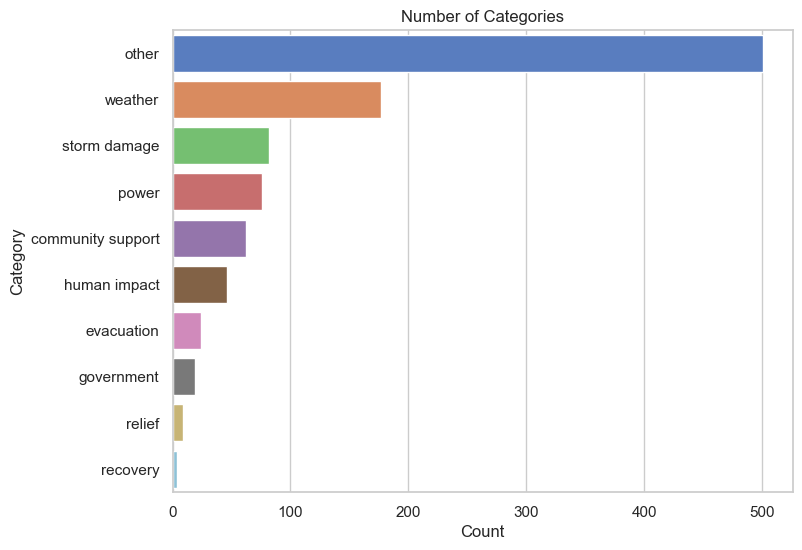

In [147]:
category_counts = df["category_group"].value_counts()
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="muted")

# customize the chart
plt.title("Number of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

In [148]:
max_tweets_by_city = df.groupby("City")["Text"].max()
top_cities = max_tweets_by_city.sort_values(ascending=False)[:10]

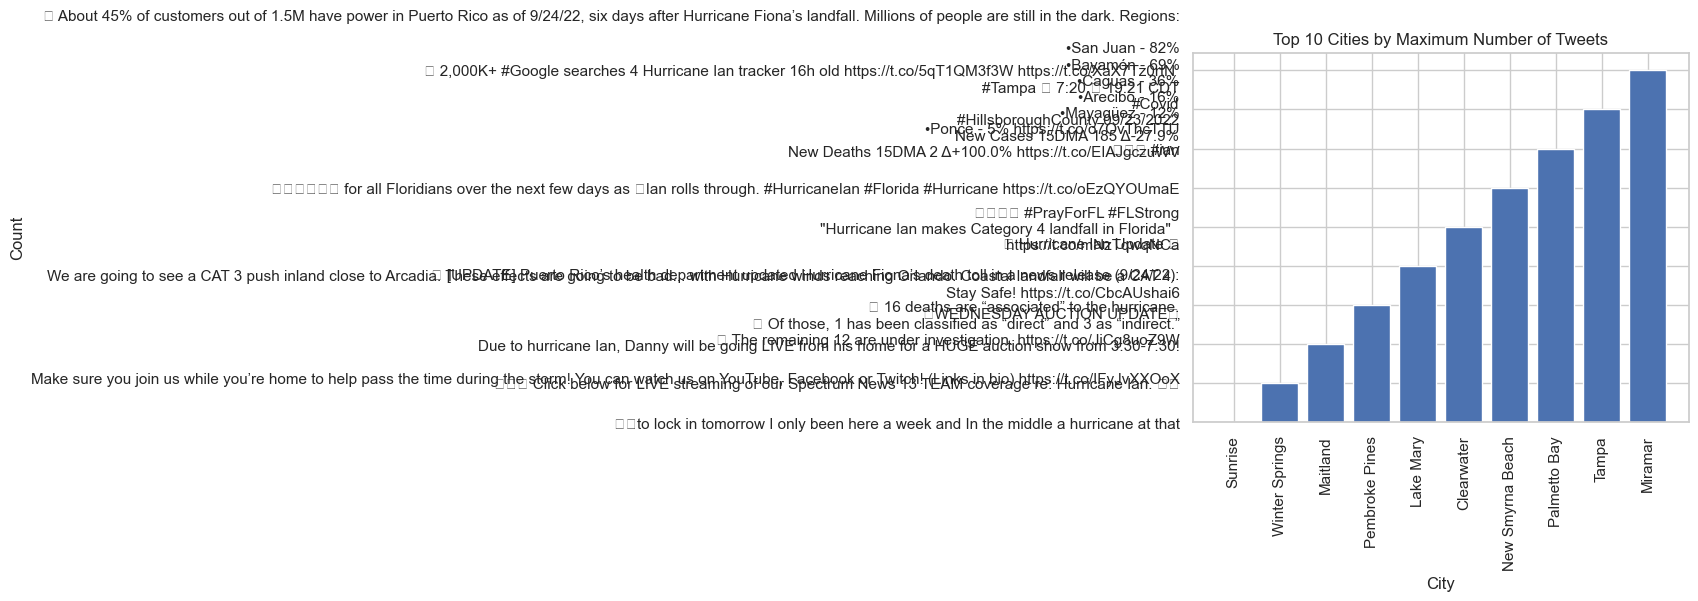

In [149]:
# Number of tweets from each of the location in the florida
# group the data by city and get the maximum number of tweets for each city
max_tweets_by_city = df.groupby("City")["Text"].max()

top_cities = max_tweets_by_city.sort_values(ascending=False)[:10]

plt.bar(top_cities.index, top_cities.values)
plt.title("Top 10 Cities by Maximum Number of Tweets")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [150]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

In [151]:
import re
from nltk.tokenize import word_tokenize
import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

import torch

import warnings
warnings.simplefilter('ignore')


In [152]:
df.isnull().sum()

City              0
Date              0
Text              0
Username          0
category_group    0
dtype: int64

In [153]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [154]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

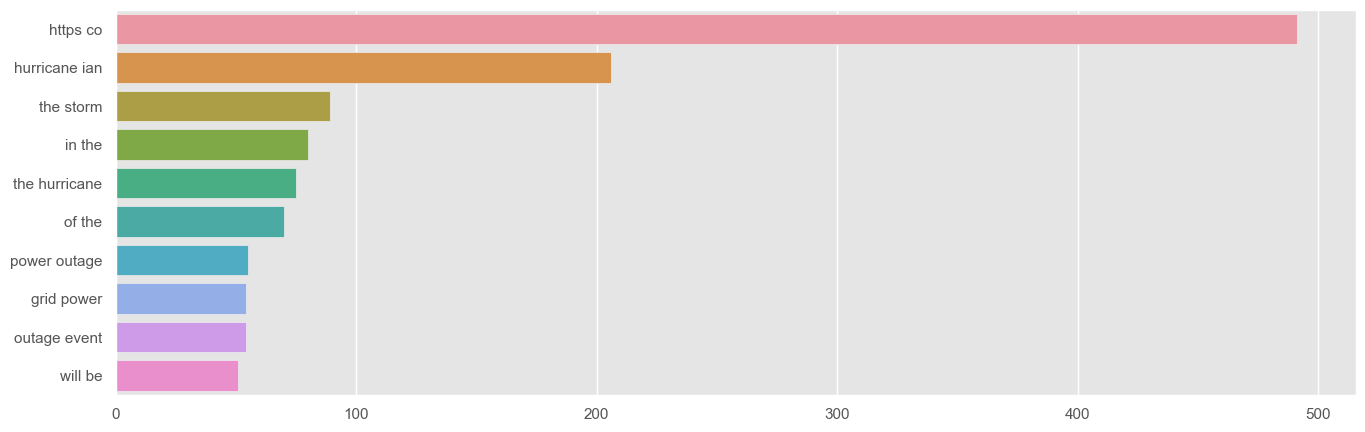

In [155]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df['Text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

### removing urls 

In [156]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['Text']=df['Text'].apply(lambda x : remove_URL(x))


In [157]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['Text']=df['Text'].apply(lambda x : remove_html(x))

In [158]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Text']=df['Text'].apply(lambda x : remove_emoji(x))

### removing punctuations 

In [159]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [160]:
df['Text']=df['Text'].apply(lambda x : remove_punct(x))

In [161]:
def create_corpus_df(df):
    corpus=[]
    
    for x in df['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [162]:
corpus=create_corpus_df(df)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [163]:
np.array(stop) # the top words that used here

array({'am', 'we', 'as', "doesn't", 'only', 'there', 'of', 'between', 'doing', 'had', "wasn't", 'all', 'now', 'mightn', 'what', 'the', 'your', "you've", 'nor', 'here', 'or', 'does', 'for', 'on', 'm', 'themselves', 'hers', 'about', 'those', 'because', 'which', 'couldn', "mightn't", 'shouldn', 'her', 'than', 'with', 'weren', 'further', 'so', 'is', 'can', 'do', 'will', 'll', 'his', 're', 'off', 'y', 'you', 'up', 'them', 'ma', 'and', 'wouldn', "hadn't", 'be', 'against', 'yours', 'at', 'was', 'shan', 'don', 'same', 'just', 'won', 'hasn', 'where', 'by', 'didn', 'above', 'each', "that'll", 'mustn', 'its', 'itself', 'until', "mustn't", "won't", 'when', 'having', 'below', 'yourselves', 'not', 'were', 'if', 'in', 'have', 'no', 'should', 'most', 'own', 'it', "you'll", 'their', 'are', 'haven', "didn't", 'our', 'that', 'very', 'who', 'under', 'how', 'ain', "aren't", 't', 'me', "needn't", "you'd", 'i', "haven't", 'theirs', 'o', 'more', 'hadn', 'after', 'myself', 'into', "shouldn't", 'ours', 'wasn', 

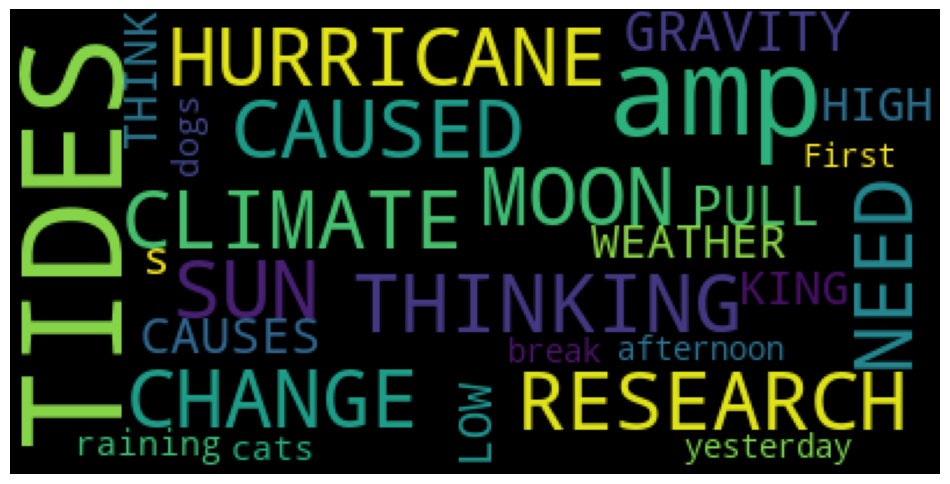

In [164]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 60
                         ).generate(" ".join(corpus[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [165]:
# changing to lower case
df['Text'] = df['Text'].apply(str.lower)

In [166]:
df.head()

,City,Date,Text,Username,category_group
0,Weston,2022-09-29 01:51:53+00:00,so for all of you thinking that this hurricane...,colleenblueeyes,other
1,Davie,2022-09-27 20:49:02+00:00,it’s been raining cats amp dogs since yesterda...,JenHemmerdinger,human impact
2,Davie,2022-09-29 00:07:23+00:00,hurricane ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather
3,St. Petersburg,2022-09-28 16:28:25+00:00,wusf is now in modified extended coverage of h...,wusfschreiner,other
4,Tampa,2022-09-24 17:13:26+00:00,tampa bay could see very deadly storm surge in...,AnthonyClose,community support


### Pre processing 

### Tokenization 

In [167]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Text'].apply(lambda x: tokenization(x.lower()))
df.head()

,City,Date,Text,Username,category_group,Tweet_tokenized
0,Weston,2022-09-29 01:51:53+00:00,so for all of you thinking that this hurricane...,colleenblueeyes,other,"[so, for, all, of, you, thinking, that, this, ..."
1,Davie,2022-09-27 20:49:02+00:00,it’s been raining cats amp dogs since yesterda...,JenHemmerdinger,human impact,"[it, s, been, raining, cats, amp, dogs, since,..."
2,Davie,2022-09-29 00:07:23+00:00,hurricane ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather,"[hurricane, ian, 5pm, advisory, shows, storm, ..."
3,St. Petersburg,2022-09-28 16:28:25+00:00,wusf is now in modified extended coverage of h...,wusfschreiner,other,"[wusf, is, now, in, modified, extended, covera..."
4,Tampa,2022-09-24 17:13:26+00:00,tampa bay could see very deadly storm surge in...,AnthonyClose,community support,"[tampa, bay, could, see, very, deadly, storm, ..."


In [168]:
# no of unique words in the data
# Combine the text from all cells in the 'text' column
text = ' '.join(df['Text'].values)

# Tokenize the text using the word_tokenize function from the nltk library
tokens = word_tokenize(text)

# Find the unique words using the set() function
unique_words = set(tokens)
print(f" the number of unique words is {len(unique_words)}")

 the number of unique words is 4521


### remove stop words 

In [169]:
from nltk.corpus import stopwords

In [170]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,City,Date,Text,Username,category_group,Tweet_tokenized,Tweet_nonstop
0,Weston,2022-09-29 01:51:53+00:00,so for all of you thinking that this hurricane...,colleenblueeyes,other,"[so, for, all, of, you, thinking, that, this, ...","[thinking, hurricane, caused, climate, change,..."
1,Davie,2022-09-27 20:49:02+00:00,it’s been raining cats amp dogs since yesterda...,JenHemmerdinger,human impact,"[it, s, been, raining, cats, amp, dogs, since,...","[raining, cats, amp, dogs, since, yesterday, f..."
2,Davie,2022-09-29 00:07:23+00:00,hurricane ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather,"[hurricane, ian, 5pm, advisory, shows, storm, ...","[hurricane, ian, 5pm, advisory, shows, storm, ..."
3,St. Petersburg,2022-09-28 16:28:25+00:00,wusf is now in modified extended coverage of h...,wusfschreiner,other,"[wusf, is, now, in, modified, extended, covera...","[wusf, modified, extended, coverage, hurricane..."
4,Tampa,2022-09-24 17:13:26+00:00,tampa bay could see very deadly storm surge in...,AnthonyClose,community support,"[tampa, bay, could, see, very, deadly, storm, ...","[tampa, bay, could, see, deadly, storm, surge,..."
5,Miami,2022-09-24 23:25:40+00:00,the hurricanes of the manny diaz era are back,Daniel22223333,other,"[the, hurricanes, of, the, manny, diaz, era, a...","[hurricanes, manny, diaz, era, back]"
6,Coral Springs,2022-09-29 17:18:15+00:00,i don’t understand why hunter needs to straigh...,Cympyyy,human impact,"[i, don, t, understand, why, hunter, needs, to...","[understand, hunter, needs, straighten, hair, ..."
7,Kissimmee,2022-09-28 13:53:23+00:00,outer bands of hurricane ian on my inbound fli...,ChrisLarson,human impact,"[outer, bands, of, hurricane, ian, on, my, inb...","[outer, bands, hurricane, ian, inbound, flight..."
8,Safety Harbor,2022-09-27 23:11:49+00:00,lol this weather man is wild,iamJakeKurtz,other,"[lol, this, weather, man, is, wild]","[lol, weather, man, wild]"
9,Sanford,2022-09-29 07:31:22+00:00,i’m sorry for the abrupt end to stream hurrica...,VahriTV,human impact,"[i, m, sorry, for, the, abrupt, end, to, strea...","[sorry, abrupt, end, stream, hurricane, ian, s..."


### stemming 

In [171]:
import nltk
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,City,Date,Text,Username,category_group,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,Weston,2022-09-29 01:51:53+00:00,so for all of you thinking that this hurricane...,colleenblueeyes,other,"[so, for, all, of, you, thinking, that, this, ...","[thinking, hurricane, caused, climate, change,...","[think, hurrican, caus, climat, chang, need, r..."
1,Davie,2022-09-27 20:49:02+00:00,it’s been raining cats amp dogs since yesterda...,JenHemmerdinger,human impact,"[it, s, been, raining, cats, amp, dogs, since,...","[raining, cats, amp, dogs, since, yesterday, f...","[rain, cat, amp, dog, sinc, yesterday, first, ..."
2,Davie,2022-09-29 00:07:23+00:00,hurricane ian 5pm advisory shows storm weakeni...,Inka_Dageryager,weather,"[hurricane, ian, 5pm, advisory, shows, storm, ...","[hurricane, ian, 5pm, advisory, shows, storm, ...","[hurrican, ian, 5pm, advisori, show, storm, we..."
3,St. Petersburg,2022-09-28 16:28:25+00:00,wusf is now in modified extended coverage of h...,wusfschreiner,other,"[wusf, is, now, in, modified, extended, covera...","[wusf, modified, extended, coverage, hurricane...","[wusf, modifi, extend, coverag, hurricaneian, ..."
4,Tampa,2022-09-24 17:13:26+00:00,tampa bay could see very deadly storm surge in...,AnthonyClose,community support,"[tampa, bay, could, see, very, deadly, storm, ...","[tampa, bay, could, see, deadly, storm, surge,...","[tampa, bay, could, see, deadli, storm, surg, ..."


In [172]:
df.columns

Index(['City', 'Date', 'Text', 'Username', 'category_group', 'Tweet_tokenized',
       'Tweet_nonstop', 'Tweet_stemmed'],
      dtype='object')

In [173]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [174]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

### Linear Vectorization

### Linear svm model

In [99]:
from nltk.stem import SnowballStemmer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet_stemmed'], df['category_group'],test_size=0.2,random_state=42)
# Stem the text data
stemmer = SnowballStemmer('english')

# Join the stemmed words back into a single string
X_train_stemmed = [' '.join(doc) for doc in X_train]
X_test_stemmed = [' '.join(doc) for doc in X_test]

# Extract features using the Bag-of-Words model
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_stemmed)
X_test_vectorized = vectorizer.transform(X_test_stemmed)

clf = LinearSVC(random_state=42)
clf.fit(X_train_vectorized, y_train)

# Evaluate the model on the testing set
accuracy = clf.score(X_test_vectorized, y_test)

print("test Accuracy:", accuracy)


test Accuracy: 0.572


In [100]:
# accuracy ,f1-score , recall score 
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
y_pred_test = clf.predict(X_test_vectorized)
print(f" The test data accuracy linear svm  model is {accuracy_score(y_test,y_pred_test)}")
# F-1 score for test data
print(f" The f-1 score for the test data linear svm model is {f1_score(y_test,y_pred_test,average= 'weighted')}")
# recall score for test data
print(f" The recall score for the test  data linear svm model is {recall_score(y_test,y_pred_test,average= 'macro')}")

 The test data accuracy linear svm  model is 0.572
 The f-1 score for the test data linear svm model is 0.5501039411948703
 The recall score for the test  data linear svm model is 0.23848484848484847


In [101]:
# classification report 
print(classification_report(y_pred_test,y_test))

                   precision    recall  f1-score   support

community support       0.13      0.12      0.12        17
       evacuation       0.00      0.00      0.00         1
       government       0.00      0.00      0.00         0
     human impact       0.00      0.00      0.00         6
            other       0.76      0.68      0.72       146
            power       0.85      0.85      0.85        20
         recovery       0.00      0.00      0.00         0
           relief       0.00      0.00      0.00         0
     storm damage       0.17      0.25      0.20        12
          weather       0.48      0.44      0.46        48

         accuracy                           0.57       250
        macro avg       0.24      0.23      0.24       250
     weighted avg       0.62      0.57      0.59       250



In [102]:
# confusion matrix
print(confusion_matrix(y_pred_test,y_test))

[[  2   1   0   0   7   1   1   1   2   2]
 [  0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   1   0   0   2   1]
 [  8   3   2   8 100   0   0   2   7  16]
 [  0   0   0   0   0  17   0   0   1   2]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   7   0   0   0   3   2]
 [  5   0   0   1  15   1   1   1   3  21]]


### xg boost model

In [103]:
df['category_group'].unique()

array(['other', 'human impact', 'weather', 'community support', 'power',
       'storm damage', 'relief', 'evacuation', 'government', 'recovery'],
      dtype=object)

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
k = ['category_group']
df[k] = df[k].apply(le.fit_transform)
y = df['category_group']

In [110]:
y.unique()

array([4, 3, 9, 0, 5, 8, 7, 1, 2, 6])

In [111]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

# Join the stemmed words back into a single string
X_stemmed = [' '.join(doc) for doc in df['Tweet_stemmed']]


# Extract features using the Bag-of-Words model
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_stemmed)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y,test_size=0.2,random_state=42)

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [112]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
xg = XGBClassifier()
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01,0.1],
           'n_estimators': [100,200,500],
           'colsample_bytree': [0.3, 0.7]}
radom = RandomizedSearchCV(estimator = xg, param_distributions = params, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
radom.fit(X_vectorized, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.7],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=2)

In [113]:
radom.best_params_

{'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y,test_size=0.25,random_state=42)

In [44]:
y_test.unique()

array([11,  5,  4,  1, 10,  3,  6,  8,  2,  7,  0])

In [115]:
# best xgb model
best_xgb = XGBClassifier(n_estimators= 100,
 max_depth= 10,
 learning_rate= 0.01,
 colsample_bytree= 0.7)
best_xgb.fit(X_vectorized,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [116]:
# predicting for test data
y_pred_test = best_xgb.predict(X_test)
print(f" The test data accuracy linear svm  model is {accuracy_score(y_test,y_pred_test)}")
# F-1 score for test data
print(f" The f-1 score for the test data linear svm model is {f1_score(y_test,y_pred_test,average= 'weighted')}")
# recall score for test data
print(f" The recall score for the test  data linear svm model is {recall_score(y_test,y_pred_test,average= 'macro')}")

 The test data accuracy linear svm  model is 0.712
 The f-1 score for the test data linear svm model is 0.6500757973733583
 The recall score for the test  data linear svm model is 0.2958080808080808


In [117]:
# classification report
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      0.67      0.80       196
           5       0.95      0.90      0.93        21
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.44      1.00      0.62         8
           9       0.36      0.76      0.49        21

    accuracy                           0.71       250
   macro avg       0.30      0.43      0.32       250
weighted avg       0.91      0.71      0.77       250



In [118]:
# confusion matrix
print(confusion_matrix(y_pred_test,y_test))

[[  3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 11   4   2   9 132   1   0   4   7  26]
 [  0   0   0   0   0  19   0   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8   0]
 [  1   0   0   0   0   0   1   0   3  16]]


### Random forest 

In [119]:
from sklearn.ensemble import RandomForestClassifier
raf = RandomForestClassifier()

In [120]:
# Hyper parameter validation
# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': [5, 10,15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
           
grid_search = GridSearchCV(raf, param_grid, cv=5)
grid_search.fit(X_vectorized, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [121]:
grid_search.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [122]:
# random forest model
best_random = RandomForestClassifier(max_depth= 15,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)
best_random.fit(X_vectorized, y)

RandomForestClassifier(max_depth=15)

In [123]:
# predicting for test data
y_pred_test = best_random.predict(X_test)
print(f" The test data accuracy linear svm  model is {accuracy_score(y_test,y_pred_test)}")
# F-1 score for test data
print(f" The f-1 score for the test data linear svm model is {f1_score(y_test,y_pred_test,average= 'weighted')}")
# recall score for test data
print(f" The recall score for the test  data linear svm model is {recall_score(y_test,y_pred_test,average= 'macro')}")

 The test data accuracy linear svm  model is 0.644
 The f-1 score for the test data linear svm model is 0.5590966386554621
 The recall score for the test  data linear svm model is 0.21833333333333335


In [124]:
# classification report for random forest
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.07      1.00      0.12         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.60      0.75       220
           5       0.70      1.00      0.82        14
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.17      1.00      0.29         3
           9       0.25      0.92      0.39        12

    accuracy                           0.64       250
   macro avg       0.22      0.45      0.24       250
weighted avg       0.93      0.64      0.73       250



In [125]:
# confusion matrix for random forest
print(confusion_matrix(y_pred_test,y_test))

[[  1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 14   4   2   9 132   6   2   4  14  33]
 [  0   0   0   0   0  14   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   1  11]]


## mlp classifier  deep learning model

In [126]:
from sklearn.neural_network import MLPClassifier


In [127]:
# Hyper parameter validation for the model
mlp = MLPClassifier()
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (500,), (1000,)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Perform grid search cross-validation

clf = RandomizedSearchCV(mlp, param_grid, random_state=0)
clf.fit(X_vectorized, y)

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(100,), (200,),
                                                               (500,),
                                                               (1000,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   random_state=0)

In [128]:
clf.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (200,),
 'alpha': 0.01,
 'activation': 'logistic'}

In [129]:
# best mlp model
best_mlp = MLPClassifier(solver= 'adam',
 learning_rate= 'constant',
 hidden_layer_sizes= (200,),
 alpha= 0.01,
 activation ='logistic')
best_mlp.fit(X_vectorized,y)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(200,))

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y,test_size=0.25,random_state=42)

In [131]:
# predicting for test data
y_pred_test = best_mlp.predict(X_test)
print(f" The test data accuracy linear svm  model is {accuracy_score(y_test,y_pred_test)}")
# F-1 score for test data
print(f" The f-1 score for the test data linear svm model is {f1_score(y_test,y_pred_test,average= 'weighted')}")
# recall score for test data
print(f" The recall score for the test  data linear svm model is {recall_score(y_test,y_pred_test,average= 'macro')}")

 The test data accuracy linear svm  model is 0.964
 The f-1 score for the test data linear svm model is 0.9640876548738617
 The recall score for the test  data linear svm model is 0.9492424242424242


In [132]:
# classification report for random forest
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       0.89      0.89      0.89         9
           4       0.98      0.98      0.98       132
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         3
           8       0.94      1.00      0.97        17
           9       0.93      0.95      0.94        43

    accuracy                           0.96       250
   macro avg       0.95      0.97      0.95       250
weighted avg       0.97      0.96      0.96       250



In [133]:
# confusion matrix for random forest
print(confusion_matrix(y_pred_test,y_test))

[[ 15   0   0   0   2   0   0   1   0   0]
 [  0   4   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   1]
 [  0   0   0   1 129   0   0   0   0   2]
 [  0   0   0   0   0  20   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   0   0  17   0]
 [  0   0   0   0   1   0   0   0   1  41]]


### rnn model for text classification 

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Set hyperparameters
vocab_size = 5000
embedding_dim = 50
max_length = 200
num_classes = 10

# Load and preprocess data
# X: list of input texts, y: list of labels
# Here, we assume X and y are already preprocessed and tokenized
X =  [' '.join(doc) for doc in df['Tweet_stemmed']] 
y = y


# Tokenize input texts and convert them to sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to have the same length
X_padded = pad_sequences(X_seq, maxlen=max_length)

print(X_padded.shape)
# Split data into training and testing sets
split_ratio = 0.2
split_idx = int(len(X_padded) * split_ratio)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y,test_size=0.2,random_state=42)

from keras.utils import to_categorical

# Convert y to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


(1000, 200)
Epoch 1/50
25/25 [==============================] - 4s 87ms/step - loss: 1.9461 - accuracy: 0.4725 - val_loss: 1.6545 - val_accuracy: 0.5150
Epoch 2/50
25/25 [==============================] - 2s 69ms/step - loss: 1.6143 - accuracy: 0.4975 - val_loss: 1.5718 - val_accuracy: 0.5150
Epoch 3/50
25/25 [==============================] - 2s 69ms/step - loss: 1.5524 - accuracy: 0.5000 - val_loss: 1.5317 - val_accuracy: 0.5350
Epoch 4/50
25/25 [==============================] - 2s 68ms/step - loss: 1.4359 - accuracy: 0.5312 - val_loss: 1.5106 - val_accuracy: 0.5200
Epoch 5/50
25/25 [==============================] - 2s 69ms/step - loss: 1.2761 - accuracy: 0.5788 - val_loss: 1.4704 - val_accuracy: 0.5300
Epoch 6/50
25/25 [==============================] - 2s 68ms/step - loss: 1.0492 - accuracy: 0.6200 - val_loss: 1.5494 - val_accuracy: 0.4700
Epoch 7/50
25/25 [==============================] - 2s 69ms/step - loss: 0.8531 - accuracy: 0.6975 - val_loss: 1.6071 - val_accuracy: 0.4700
E

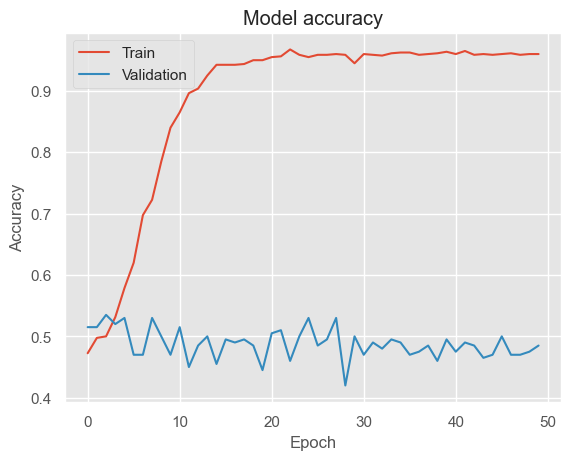

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


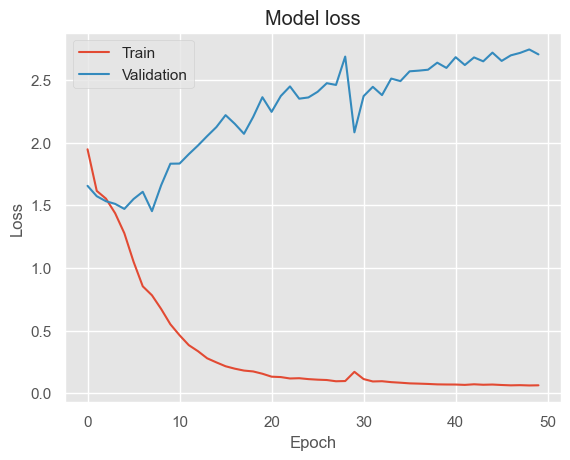

In [48]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

7/7 [==============================] - 0s 20ms/step - loss: 2.7031 - accuracy: 0.4850
Test loss: 2.703068733215332
Test accuracy: 0.48500001430511475


In [50]:
y_pred = model.predict(X_test)

7/7 [==============================] - 1s 19ms/step


In [52]:
# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.15      0.27      0.19        11
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.65      0.64      0.65       103
           5       0.91      0.56      0.69        18
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.33      0.38      0.35        16
           9       0.29      0.35      0.32        34

    accuracy                           0.48       200
   macro avg       0.23      0.22      0.22       200
weighted avg       0.50      0.48      0.49       200



# cnn model for text classification

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from keras.layers import Flatten



# Set hyperparameters
vocab_size = 5000
embedding_dim = 50
max_length = 200
num_classes = 10



# Define the model architecture
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(Flatten())
model_cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50
history_cnn = model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))



Epoch 1/50
25/25 [==============================] - 1s 24ms/step - loss: 1.7350 - accuracy: 0.4837 - val_loss: 1.5872 - val_accuracy: 0.5150
Epoch 2/50
25/25 [==============================] - 0s 16ms/step - loss: 1.5601 - accuracy: 0.4975 - val_loss: 1.5553 - val_accuracy: 0.5300
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 1.4739 - accuracy: 0.5400 - val_loss: 1.5229 - val_accuracy: 0.5350
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 1.3480 - accuracy: 0.5925 - val_loss: 1.4692 - val_accuracy: 0.5550
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 1.1759 - accuracy: 0.6275 - val_loss: 1.4315 - val_accuracy: 0.5300
Epoch 6/50
25/25 [==============================] - 0s 16ms/step - loss: 0.9683 - accuracy: 0.6787 - val_loss: 1.4638 - val_accuracy: 0.5250
Epoch 7/50
25/25 [==============================] - 0s 16ms/step - loss: 0.7812 - accuracy: 0.7588 - val_loss: 1.6074 - val_accuracy: 0.5350
Epoch 8/50
25

Test accuracy: 0.4749999940395355


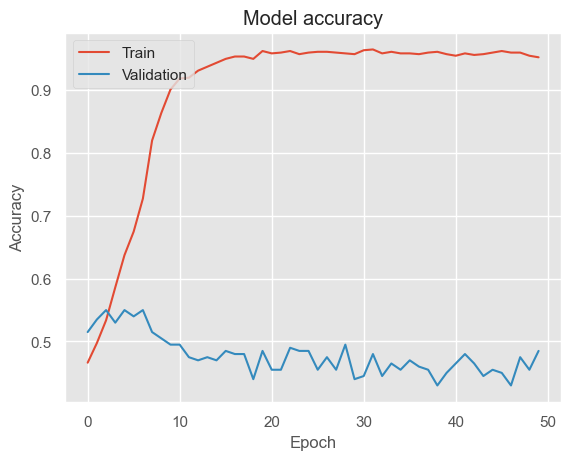

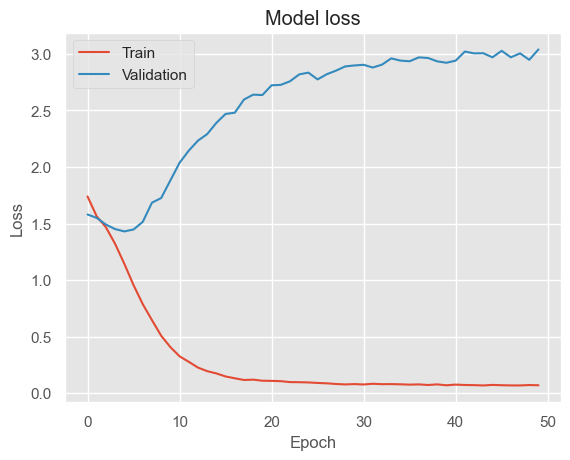

In [60]:
# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [61]:
y_pred = model_cnn.predict(X_test)
# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
print(classification_report(y_test_classes, y_pred_classes))

7/7 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.08      0.09      0.09        11
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         8
           4       0.61      0.72      0.66       103
           5       0.75      0.33      0.46        18
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.21      0.19      0.20        16
           9       0.31      0.32      0.32        34

    accuracy                           0.48       200
   macro avg       0.20      0.17      0.17       200
weighted avg       0.46      0.47      0.46       200



### predicting the ouput label for the new data using mlp classifier .

In [129]:
# predicting the output label for the data we have downloaded intially 
# loading the data 
project_data = pd.read_csv('group38_data.csv')
p_data = project_data.drop('Unnamed: 0',axis=1)
p_data.head()

,City,Date,Text,Username
0,Jacksonville,2022-09-29 21:13:58+00:00,Windows open in this weather babyyyy,TheBigGuy904
1,Jacksonville,2022-09-29 16:58:32+00:00,Thank you for all the coverage of #Ida @Keitha...,PatrickFon12
2,Jacksonville,2022-09-29 13:57:51+00:00,Due to weather at the Beach being more intense...,904Donatos
3,Jacksonville,2022-09-29 10:20:57+00:00,Haggai 2 God’s message was “be strong &amp; c...,J19foundation
4,Jacksonville,2022-09-29 01:04:01+00:00,Thanks for bringing us the latest weather upda...,PatrickFon12


In [130]:
X = p_data[:100]
print(X.shape)

(100, 4)


In [132]:
# data cleaning

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
X_te=X['Text'].apply(lambda x : remove_URL(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
X_re=X_te.apply(lambda x : remove_html(x))

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
X_em=X_re.apply(lambda x : remove_emoji(x))

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
X_pun=X_em.apply(lambda x : remove_punct(x))

In [133]:
# data preprocessing 
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_token = X_pun.apply(lambda x: tokenization(x.lower()))

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text   
tweet_nonstop = tweet_token.apply(lambda x: remove_stopwords(x))

import nltk
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tweet_stemmed = tweet_nonstop.apply(lambda x: stemming(x))



In [175]:
# Join the stemmed words back into a single string
X_stemmed = [' '.join(doc) for doc in df['Tweet_stemmed']]
# Extract features using the Bag-of-Words model
le = preprocessing.LabelEncoder()
k = ['category_group']
df[k] = df[k].apply(le.fit_transform)
y = df['category_group']
from sklearn.feature_extraction.text import CountVectorizer#making text into vectors
X_st = [' '.join(doc) for doc in tweet_stemmed]
combined_text = X_stemmed + X_st
vectorizer = CountVectorizer()
# Fit the vectorizer on the combined text data
vectorizer.fit(combined_text)
X1 = vectorizer.transform(X_stemmed)
X2 = vectorizer.transform(X_st)

In [96]:
from sklearn.neural_network import MLPClassifier

# best mlp model for estimation 
# best mlp model
best_mlp = MLPClassifier(solver= 'adam',
 learning_rate= 'constant',
 hidden_layer_sizes= (200,),
 alpha= 0.01,
 activation ='logistic')
best_mlp.fit(X1,y)

MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(200,))

In [176]:
# predicting using the data
y_pred = best_mlp.predict(X2)
# Revert output labels back to their original text format
label_dict = {i: label for i, label in enumerate(le.classes_)}
y_predicted = [label_dict[pred] for pred in y_pred]
X['output_predicted'] = y_predicted

In [127]:
import pandas as pd

# Assuming 'y_predicted_encoded' contains the encoded output labels
y_predicted_encoded = [4, 3, 9, 0, 5, 8, 7, 1, 2, 6]

# Mapping of encoded values to category group words
label_map = {4: 'other', 3: 'human impact', 9: 'weather', 0: 'community support', 5: 'power', 8: 'storm damage', 7: 'relief', 1: 'evacuation', 2: 'government', 6: 'recovery'}

# Creating a new column with the predicted category group words
X['predicted_category_group'] = pd.Series(y_predicted_encoded).map(label_map)


In [177]:
X.head()

,City,Date,Text,Username,output_predicted
0,Jacksonville,2022-09-29 21:13:58+00:00,Windows open in this weather babyyyy,TheBigGuy904,other
1,Jacksonville,2022-09-29 16:58:32+00:00,Thank you for all the coverage of #Ida @Keitha...,PatrickFon12,weather
2,Jacksonville,2022-09-29 13:57:51+00:00,Due to weather at the Beach being more intense...,904Donatos,other
3,Jacksonville,2022-09-29 10:20:57+00:00,Haggai 2 God’s message was “be strong &amp; c...,J19foundation,other
4,Jacksonville,2022-09-29 01:04:01+00:00,Thanks for bringing us the latest weather upda...,PatrickFon12,weather


In [178]:
X.to_csv('C:\\Users\\vasuk\\OneDrive\\Desktop\\Data\\CNST\\predicted.csv')